In [1]:

using Jacobi
using PyPlot
using DataFrames
using Interact
include("../../HPFEM.jl/src/HPFEM.jl")
include("../src/HPFEM_mod.jl")


lagrange_oed_spec (generic function with 5 methods)

# Edo
   $$ y'' + y = (1 + 4 (k \pi)^2)sin(2 k \pi x) \\
      y(-1) = y(1) = 0$$

/home/augusto/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axis.py:1015: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/home/augusto/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axis.py:1025: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


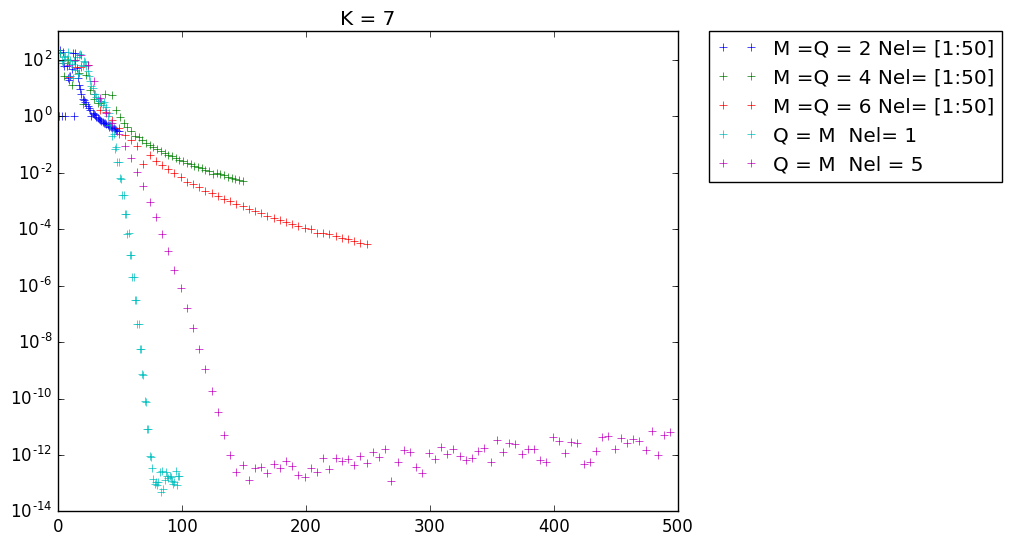

PyObject <matplotlib.legend.Legend object at 0x7eff1a1209d0>

In [2]:
k = 7
Q_max = M_max = 100
nel_max = 50


fun(x) = (1 + 4*(k*pi)^2)*sin(2*k*pi*x)
resp(x) = sin(2*k*pi*x)

EMM =DataFrame(erro = Float64[], dof =  Float64[])
EM2 =DataFrame(erro = Float64[], dof =  Float64[])
for M = 3:M_max
    temp = lagrange_oed_spec(M,M,1,fun,resp)
    push!(EMM,temp)

    temp = lagrange_oed_spec(M,M,5,fun,resp)
    push!(EM2,temp)
end
EMe2 =DataFrame(erro = Float64[], dof =  Float64[])
EMe3 =DataFrame(erro = Float64[], dof =  Float64[])
EMe = DataFrame(erro = Float64[], dof =  Float64[])
for nel = 1:nel_max
    temp = lagrange_oed_spec(4,4,nel,fun,resp)
    push!(EMe,temp)

    temp = lagrange_oed_spec(2,2,nel,fun,resp)
    push!(EMe2,temp)

    temp = lagrange_oed_spec(6,6,nel,fun,resp)
    push!(EMe3,temp)
end    
semilogy(EMe2[:dof],EMe2[:erro],"+",label = "M =Q = 2 Nel= [1:$nel_max]")
semilogy(EMe[:dof],EMe[:erro],"+",label = "M =Q = 4 Nel= [1:$nel_max]")
semilogy(EMe3[:dof],EMe3[:erro],"+",label = "M =Q = 6 Nel= [1:$nel_max]")
semilogy(EMM[:dof],EMM[:erro],"+",label = "Q = M  Nel= 1")
semilogy(EM2[:dof],EM2[:erro],"+",label = "Q = M  Nel = 5")
title("K = $k")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"Q",50,1:1:100,true)

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"M",50,1:1:100,true)

Interact.Slider{Int64}(Signal{Int64}(25, nactions=0),"nel",25,1:1:50,true)

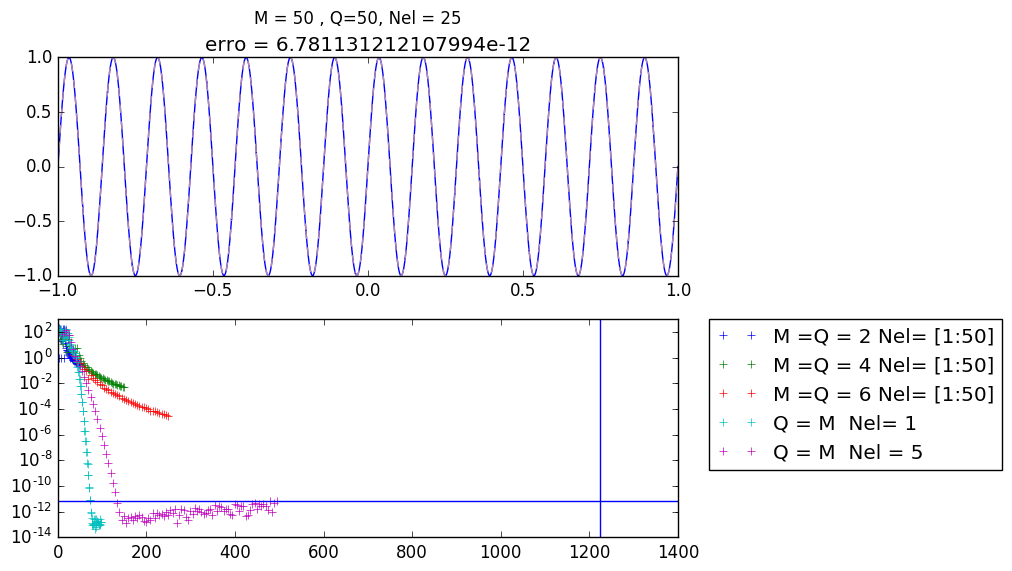

In [3]:
l = figure(2)
Q_max = M_max = 100
nel_max = 50
@manipulate for Q= 1:1:Q_max,M=1:1:M_max, nel=1:1:nel_max; withfig(l) do
        fun(x) = (1 + 4*(k*pi)^2)*sin(2*k*pi*x)
        resp(x) = sin(2*k*pi*x)
        if Q < M
            Q=M
        end
        subplot(211)
        erro = lagrange_oed_plot(M,Q,nel,fun,resp)
        dof = lagrange_oed_spec(M,Q,nel,fun,resp)
        

        subplot(212)
        
        semilogy(EMe2[:dof],EMe2[:erro],"+",label = "M =Q = 2 Nel= [1:$nel_max]")
        semilogy(EMe[:dof],EMe[:erro],"+",label = "M =Q = 4 Nel= [1:$nel_max]")
        semilogy(EMe3[:dof],EMe3[:erro],"+",label = "M =Q = 6 Nel= [1:$nel_max]")
        semilogy(EMM[:dof],EMM[:erro],"+",label = "Q = M  Nel= 1")
        semilogy(EM2[:dof],EM2[:erro],"+",label = "Q = M  Nel = 5")
        
        PyPlot.axhline(dof[1])
        PyPlot.axvline(dof[2])
        legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    end
end